In [1]:
import sys, os
import h5py
import numpy as np

sys.path.append('../src/')
from tensor import Particles

import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
hf = h5py.File('../data/elucid_noQ_mock.hdf5', 'r')['particles']
idx = hf['cen_flag'] == 0
pos = np.stack((hf['x'][idx], hf['y'][idx], hf['z'][idx]), axis=1)
mass = hf['host_lgmass'][idx]
# del hf

ngrid = 256                  
Lbox = 500                   
Rs = 1                       
workers = os.cpu_count() - 2 
print(f'No. CPU: {workers}')

No. CPU: 6


In [10]:
grid = Particles(ngrid, Lbox)
grid.assign(pos, mass)
grid.TensorField(Rs, workers=workers)

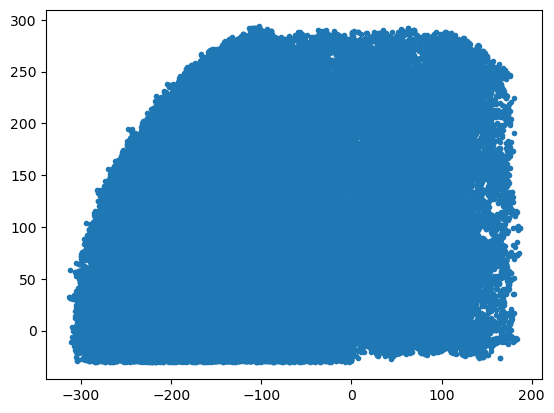

In [14]:
plt.plot(hf['x'], hf['z'], '.')